<a href="https://colab.research.google.com/github/argenis-gomez/Heart-attacks-prediction/blob/main/Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de ataques al corazon

En este notebool intentaremos predecir si una persona tiene riesgo de sufrir de un ataque al corazón.

1. Descargamos el Dataset.
2. Hacemos análisis exploratorio.
3. Preparamos los datos para entrenar el modelo.
4. Creamos un modelo y buscamos los mejores Hyper Parámetros para entrenarlo.
5. Evaluamos el modelo.


## Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Descargar dataset

Descargaremos el dataset de Kaggle

In [2]:
!mkdir /root/.kaggle
!cp "./drive/MyDrive/kaggle.json" "/root/.kaggle/"
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset --unzip

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 6.93MB/s]


In [3]:
df = pd.read_csv("heart.csv")

## Exploración de datos

Realizaremos exploración de los datos y determinaremos cuales son los factores que pueden aumentar el riego de sufrir un ataque cardiaco.

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print(f"Los datos tienen la forma: {df.shape}")

Los datos tienen la forma: (303, 14)


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No tenemos ningún dato faltante en este dataset por lo que no tenemos que llevar a cabo ningún procedimiento especial para tratar con la falta de algún campo.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
uniq_values = {}

for col in df.columns:
  uniq_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(uniq_values, index=["valores unicos"])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
valores unicos,41,2,4,49,152,2,3,91,2,40,3,5,4,2


Separamos el dataset en  variables continuas y variables categóricas.

In [9]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
target_col = ["output"]

print("Columnas categóricas: ", cat_cols)
print("Columnas continuas: ", con_cols)
print("Variable objetivo:  ", target_col)

Columnas categóricas:  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
Columnas continuas:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Variable objetivo:   ['output']


### Visualización de datos

In [10]:
background_color = "#C0BEBE"
color_palette = ["#800000", "#6aac90", "#5833ff", "#8000ff", "#da8829"]

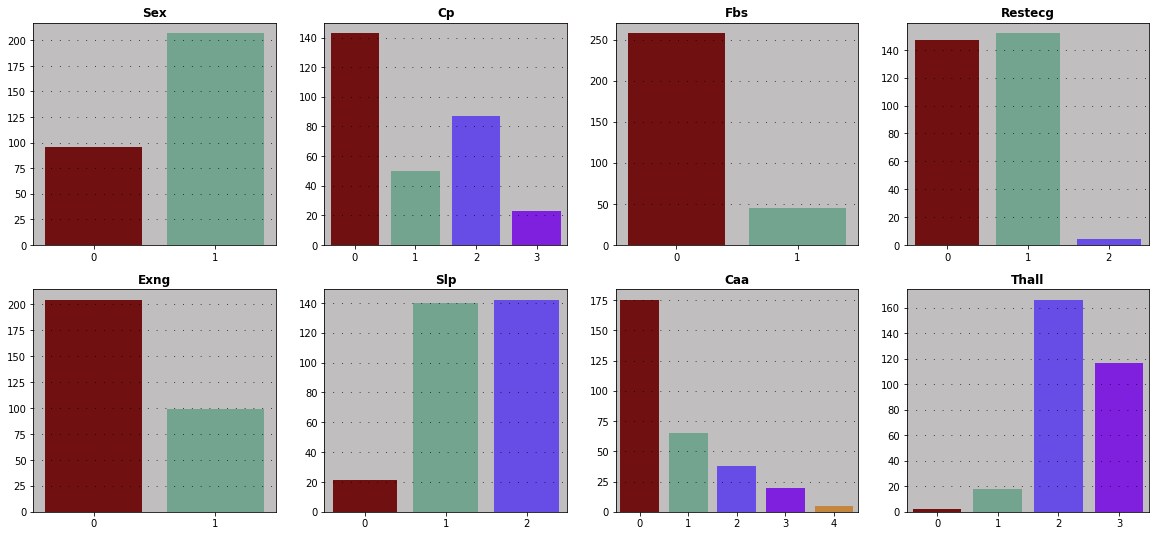

In [11]:
#@title Distribución de variables categóricas

plt.figure(figsize=(20, 9))

for i, cat in enumerate(cat_cols):
  plt.subplot(2, 4, i+1, facecolor=background_color)
  plt.title(cat.title(), fontweight='bold')
  sns.countplot(data=df, x=cat, palette=color_palette, )
  plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1, 10))
  plt.xlabel('')
  plt.ylabel('')

plt.show()

El dataset tiene dos veces más hombres que mujeres. Esto se debe a que los hombres tienen más chance a sufrir ataques al corazón biológicamente.

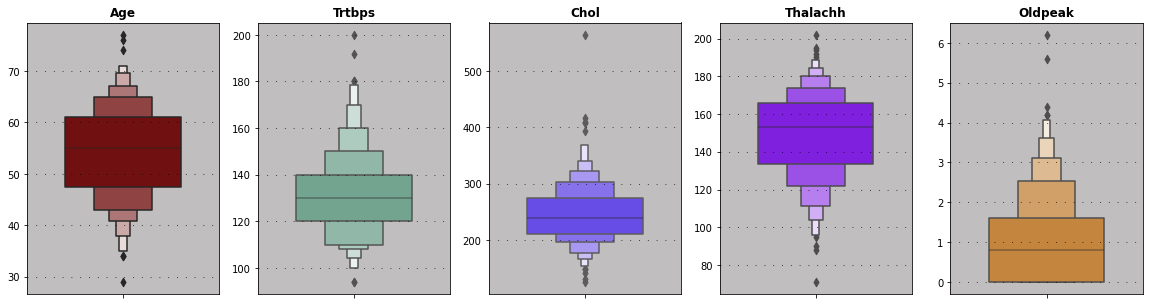

In [12]:
#@title Distribución de variables continuas

plt.figure(figsize=(20, 5))

for i, con in enumerate(con_cols):
  plt.subplot(1, 5, i+1, facecolor=background_color)
  plt.title(con.title(), fontweight='bold')
  sns.boxenplot(data=df, y=con, palette=[color_palette[i]], width=0.6)
  plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1, 10))
  plt.xlabel('')
  plt.ylabel('')

plt.show()

Se pueden observar algunos outliers dentro de las variables continuas.

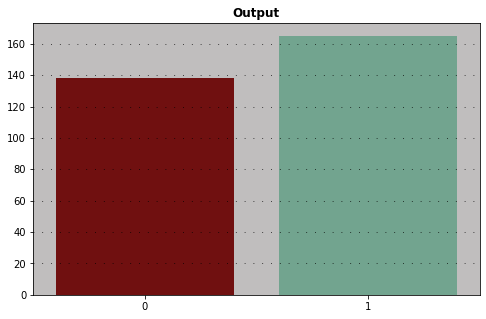

In [13]:
#@title Variable objetivo

plt.figure(figsize=(8, 5))
plt.axes(facecolor=background_color)

plt.title('Output', fontweight='bold')
sns.countplot(data=df, x='output', palette=color_palette)
plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1, 10))
plt.xlabel('')
plt.ylabel('')

plt.show()

In [14]:
conteo_output = Counter(df['output'])

for k, v in conteo_output.items():
  text = 'Alta' if k==1 else 'Baja'
  print(f'{text} posibilidad: {v}')

relation_output = conteo_output[0] / conteo_output[1]
print(f'Relación: {relation_output:.4f}')

Alta posibilidad: 165
Baja posibilidad: 138
Relación: 0.8364


El dataset no está totalmente balanceado. Tiene más datos de personas con mayor probabilidad de sufrir infarto.

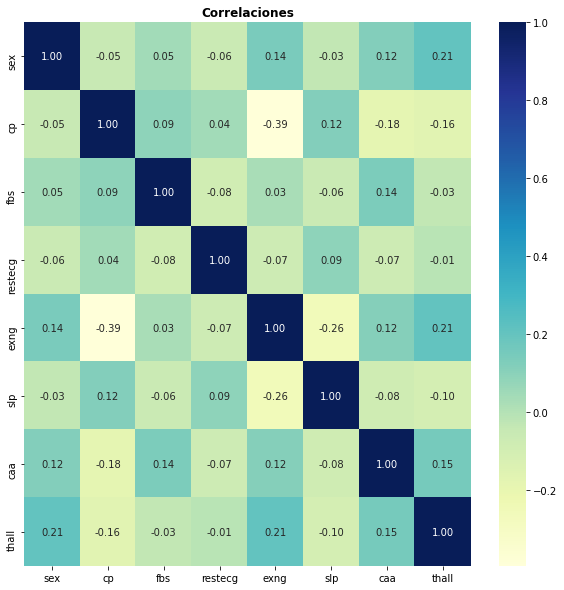

In [15]:
#@title Correlación de variables categóricas

fig = plt.figure(figsize=(10,10))

plt.title('Correlaciones', fontweight='bold')

df_corr = df[cat_cols].corr().transpose()

sns.heatmap(df_corr, fmt=".2f", annot=True, cmap='YlGnBu')
plt.show()

No tenemos correlaciones entre las variables categóricas.

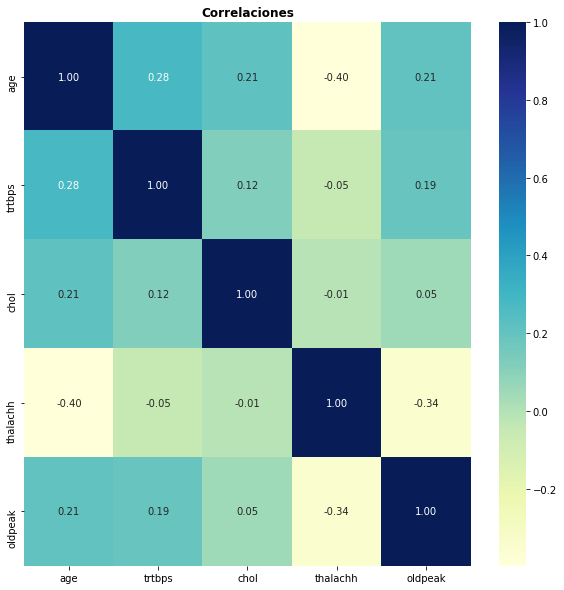

In [16]:
#@title Correlación de variables continuas

fig = plt.figure(figsize=(10,10))

plt.title('Correlaciones', fontweight='bold')

df_corr = df[con_cols].corr().transpose()

sns.heatmap(df_corr, fmt=".2f", annot=True, cmap='YlGnBu')
plt.show()

No tenemos correlaciones entre las variables continuas.

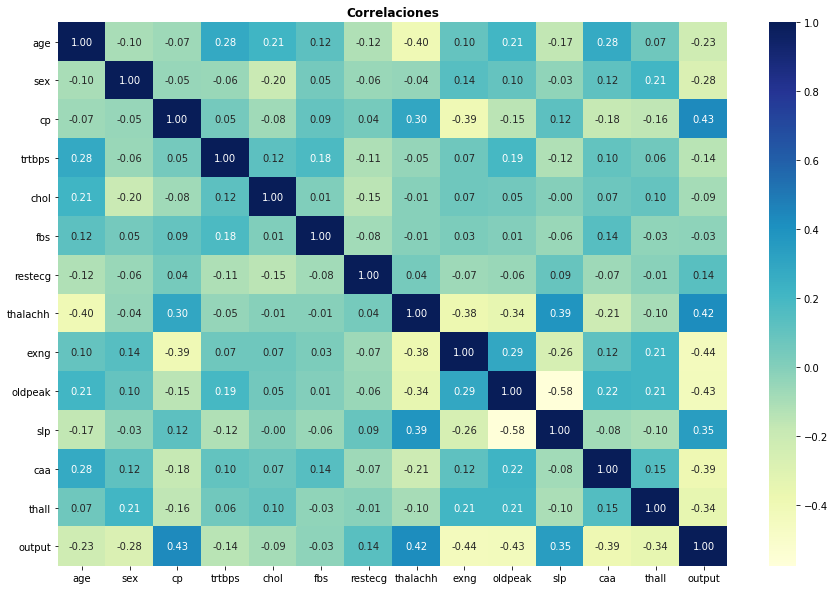

In [17]:
#@title Correlación de todas las variables

fig = plt.figure(figsize=(15,10))

plt.title('Correlaciones', fontweight='bold')

df_corr = df.corr()

sns.heatmap(df_corr, fmt=".2f", annot=True, cmap='YlGnBu')
plt.show()

Podemos observar que CP, THALACHH y SLP están parcialmente correlacionadas con la probabilidad de sufrir un ataque al corazón.

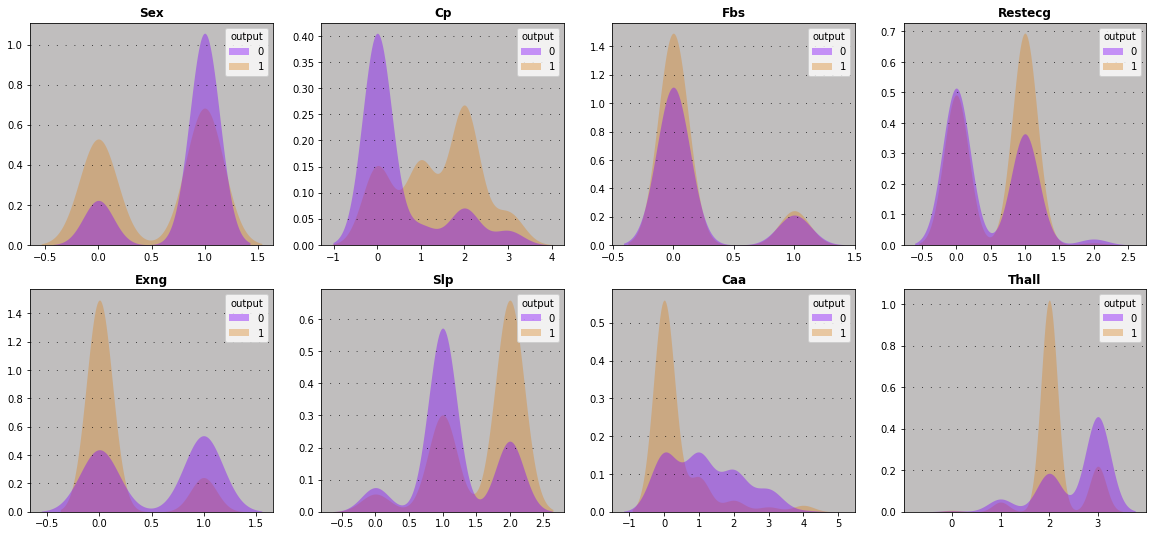

In [18]:
#@title Distribución de variables categóricas con respecto a la variable objetivo

plt.figure(figsize=(20, 9))

for i, cat in enumerate(cat_cols):
  plt.subplot(2, 4, i+1, facecolor=background_color)
  plt.title(cat.title(), fontweight='bold')
  sns.kdeplot(data=df, x=cat, hue='output', fill=True,
              palette=color_palette[-2:], alpha=.4, linewidth=0)
  plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1, 10))
  plt.xlabel('')
  plt.ylabel('')

plt.show()


* Contrario a lo que se esperaba, las mujeres son más propensas a presentar ataques cardiacos en este caso.
* Las personas que no han sufrido angina de pecho son más propensas a presentar ataques cardiacos.
* El indice glucémico no es un factor determinante en la probabilidad de causar un ataque cardiaco.
* Las personas con anormalidades en la onda ST-T tienen mayor probabilidad de sufrir un ataque cardiaco.
* Las personas que no sufren angina de pecho cuando se ejercitan, a pesar que pueda paracer contradictorio, tienen más probabilidad de sufrir un ataque cardiaco.
* Las personas con 0 vasos principales tienen más probabilidad de sufrir un ataque al corazón.
* Las personas con prueba de esfuerzo 2 son mas propensos a sufir un ataque cardiaco.

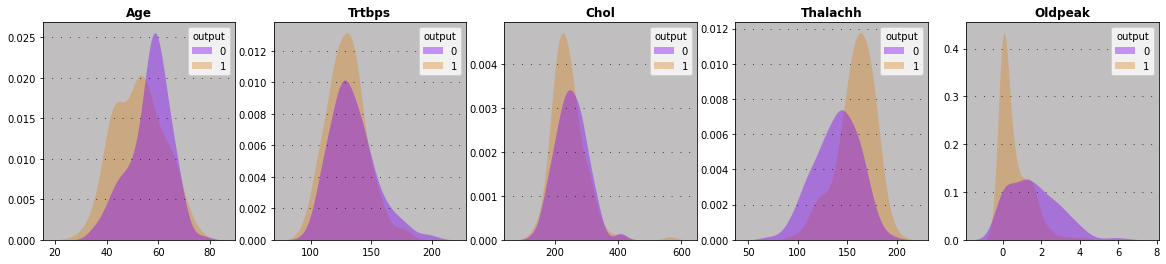

In [19]:
#@title Distribución de variables continuas con respecto a la variable objetivo

plt.figure(figsize=(20, 4))

for i, con in enumerate(con_cols):
  plt.subplot(1, 5, i+1, facecolor=background_color)
  plt.title(con.title(), fontweight='bold')
  sns.kdeplot(data=df, x=con, hue='output', fill=True,
              palette=color_palette[-2:], alpha=.4, linewidth=0)
  plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1, 10))
  plt.xlabel('')
  plt.ylabel('')

plt.show()

* Las personas entre 50 y 60 años tienen más posibilidades de sufrir ataque cardiacos.
* Las personas con una presión sanguinea alrededor de 140mmHg tienen mayor posibilidad de sufrir ataques.
* Las personas con un molesteron mayor a 200mg/dL tienen altas probabilidades de sufrir un ataque al corazón, esto se entiende ya que el rango recomendado es de 125 a 200 mg/dL.
* Las personas que han alcanzado un pico muy alto en el ritmo cardiaco pueden sufrir un ataque al corazón.
* Las personas con un oldpeak previo bajo tienen más probabilidad de sufrir un ataque cardiaco.

## Preparación de los datos

In [20]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 102kB 10.4MB/s 


In [23]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras_tuner import RandomSearch
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [24]:
tf.random.set_seed(905)
AUTOTUNE = tf.data.AUTOTUNE

BATCH_SIZE = 8

In [25]:
df1 = df

df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

X = df1.drop(['output'], axis=1)
y = df1[['output']]

scaler = Normalizer()

X[con_cols] = scaler.fit_transform(X[con_cols])

In [26]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.197466,0.454485,0.730310,0.470156,0.007209,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.108753,0.382105,0.734817,0.549643,0.010287,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.136832,0.433857,0.680821,0.574026,0.004672,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.172888,0.370475,0.728601,0.549538,0.002470,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0.138435,0.291442,0.859754,0.395876,0.001457,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [27]:
print(f"Los datos preparados tienen la forma: {X.shape}")

Los datos preparados tienen la forma: (303, 22)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

## Modelado

Utilizando Keras Tuner buscaremos el mejor modelo e hiperparámetros.

In [29]:
def build_model(hp):

  model = tf.keras.Sequential()

  model.add(
      layers.InputLayer(input_shape=(22,))
  )

  for i in range(hp.Int("num_layers", 2, 10)):

    model.add(
      layers.Dense(
        units=hp.Int(f"units_{i}",
                     min_value=32,
                     max_value=512,
                     step=32),
        activation="relu",
      )
    )
    model.add(
        layers.Dropout(
            rate=hp.Choice(f"dropout_{i}", [0.2, 0.3, 0.4])
        )
    )

  model.add(
      layers.Dense(units=1, activation="sigmoid")
      )

  model.compile(
      optimizer=Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
      loss=binary_crossentropy,
      metrics=["accuracy"],
  )

  return model

In [30]:
tuner = RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=200,
    overwrite=True,
    directory="tuner",
    project_name="heart_attack",
)

In [31]:
tuner.search(train_ds,
             epochs=50,
             validation_data=test_ds,
             callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

Trial 200 Complete [00h 00m 07s]
val_loss: 0.33437755703926086

Best val_loss So Far: 0.28008273243904114
Total elapsed time: 00h 11m 48s
INFO:tensorflow:Oracle triggered exit


In [32]:
best_hp = tuner.get_best_hyperparameters(1)[0]

model = tuner.get_best_models(1)[0]

In [33]:
model.summary()

model.evaluate(test_ds)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               6624      
_________________________________________________________________
dropout (Dropout)            (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               83232     
_________________________________________________________________
dropout_1 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 448)               129472    
_________________________________________________________________
dropout_2 (Dropout)          (None, 448)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1

[0.28008273243904114, 0.9016393423080444]

Obtuvimos un 90% de precisión en el dataset de pruebas.

In [45]:
model.save(filepath='./drive/MyDrive/Heart Attacks/Model/heart_attacks.h5',
           include_optimizer=False)